# Recreating Fig. 2

The paper [NOISE OR SIGNAL: THE ROLE OF IMAGE BACKGROUNDS IN OBJECT RECOGNITION](https://openreview.net/pdf?id=gl3D-xY7wLq) explores the effect of background on predictive deep learning models.


![title](Capture.png)

In this paper they show the following accuracies can be achieved on their models when training them on modified data then testing them on the original data. 

Our goal is to recreate these results

# 1. Setting up the data

In [1]:
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from collections import Counter
import torchvision.models as models
import torchvision.transforms.functional as TF
import os
import matplotlib.pyplot as plt 
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Southampton/Year\ 4/Semester\ 2/Git/GroupWork/Deep\ Learning/

/content/drive/MyDrive/Southampton/Year 4/Semester 2/Git/GroupWork/Deep Learning


In [4]:
!tar -xvf data/no_fg.tar.gz

Streaming output truncated to the last 5000 lines.
no_fg/train/00_dog/n02105641_1411.JPEG
no_fg/train/00_dog/n02098105_195.JPEG
no_fg/train/00_dog/n02105412_7465.JPEG
no_fg/train/00_dog/n02088466_8904.JPEG
no_fg/train/00_dog/n02091467_1213.JPEG
no_fg/train/00_dog/n02086079_13106.JPEG
no_fg/train/00_dog/n02088632_1583.JPEG
no_fg/train/00_dog/n02090379_291.JPEG
no_fg/train/00_dog/n02093991_1310.JPEG
no_fg/train/00_dog/n02086240_3681.JPEG
no_fg/train/00_dog/n02095570_4161.JPEG
no_fg/train/00_dog/n02098105_2460.JPEG
no_fg/train/00_dog/n02086240_4711.JPEG
no_fg/train/00_dog/n02113186_12758.JPEG
no_fg/train/00_dog/n02096294_484.JPEG
no_fg/train/00_dog/n02090721_3527.JPEG
no_fg/train/00_dog/n02099849_2315.JPEG
no_fg/train/00_dog/n02091635_386.JPEG
no_fg/train/00_dog/n02086646_1721.JPEG
no_fg/train/00_dog/n02090622_8516.JPEG
no_fg/train/00_dog/n02090622_2931.JPEG
no_fg/train/00_dog/n02105412_3065.JPEG
no_fg/train/00_dog/n02105412_5157.JPEG
no_fg/train/00_dog/n02096051_9388.JPEG
no_fg/train/00_

In [5]:
!tar -xvf data/original.tar.gz

Streaming output truncated to the last 5000 lines.
original/train/00_dog/n02105641_1411.JPEG
original/train/00_dog/n02098105_195.JPEG
original/train/00_dog/n02105412_7465.JPEG
original/train/00_dog/n02088466_8904.JPEG
original/train/00_dog/n02091467_1213.JPEG
original/train/00_dog/n02086079_13106.JPEG
original/train/00_dog/n02088632_1583.JPEG
original/train/00_dog/n02090379_291.JPEG
original/train/00_dog/n02093991_1310.JPEG
original/train/00_dog/n02086240_3681.JPEG
original/train/00_dog/n02095570_4161.JPEG
original/train/00_dog/n02098105_2460.JPEG
original/train/00_dog/n02086240_4711.JPEG
original/train/00_dog/n02113186_12758.JPEG
original/train/00_dog/n02096294_484.JPEG
original/train/00_dog/n02090721_3527.JPEG
original/train/00_dog/n02099849_2315.JPEG
original/train/00_dog/n02091635_386.JPEG
original/train/00_dog/n02086646_1721.JPEG
original/train/00_dog/n02090622_8516.JPEG
original/train/00_dog/n02090622_2931.JPEG
original/train/00_dog/n02105412_3065.JPEG
original/train/00_dog/n0210

In [6]:
# def get_image_tensor(dataset):
#     im_data = torch.zeros(1, 3, 224, 224)
#     label_data = torch.zeros(1)
#     loc = "data/no_fg/{}/".format(dataset)
#     for index, category in enumerate(os.listdir(loc)):


#         for im_index, image_loc in enumerate(os.listdir(loc+category)):
#             if im_index%10 == 0:
#                 print("CATEGORY: ", category, " ---cat: {}/{}".format(index, len(os.listdir(loc))), "---im: {}/{}".format(im_index, len(os.listdir(loc+category))))

#             if image_loc[-5:] == ".JPEG":
#                 with Image.open(loc+category+"/"+image_loc) as image:
#                     tensor_im = TF.to_tensor(image.resize((224, 224), Image.ANTIALIAS)).unsqueeze(0)
#                     im_data = torch.cat((im_data, tensor_im))
#                     label_data = torch.cat((label_data, torch.tensor([float(index)])), 0)
        
#     return(im_data[1:], label_data[1:])

In [7]:
#im_data, label_data = get_image_tensor("train")

In [8]:
#torch.save(im_data, 'tensor.pt')

In [9]:
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor()])
train = datasets.ImageFolder('no_fg/train', transform=transform)
test = datasets.ImageFolder('no_fg/val', transform=transform)

In [10]:
N = {"train" : len(train), "test" : len(test)} 

In [11]:
names = ["dog", "bird", "wheeled_vehicle", "reptile", "carnivore", "insect", "musical_instrument", "primate", "fish"]

In [12]:
dic = {}
for i in range(len(names)):
    dic[i] = names[i]
c = dict(Counter(train.targets))



In [13]:
for i in range(len(c)):
    c[dic[i]] = c.pop(i)

In [14]:
c

{'bird': 5045,
 'carnivore': 5045,
 'dog': 5045,
 'fish': 5045,
 'insect': 5045,
 'musical_instrument': 5045,
 'primate': 5045,
 'reptile': 5045,
 'wheeled_vehicle': 5045}

In [15]:
batchsize = 256
dataloaders = {"train" : torch.utils.data.DataLoader(train, batch_size=batchsize, shuffle=True),
               "test" :  torch.utils.data.DataLoader(test,  batch_size=batchsize, shuffle=True) } 

(224, 224, 3)
musical_instrument


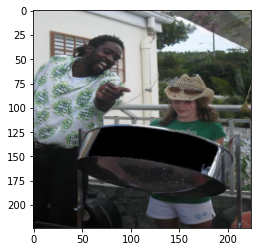

In [16]:
images, labels = next(iter(dataloaders["train"]))
im = np.asarray(images[0])
im = np.moveaxis(im, 0, -1)
print(im.shape)
print(dic[int(labels[0])])
plt.imshow(im)

# 2. Transfer Learning

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [18]:
from google.colab import files

In [19]:
device

device(type='cuda', index=0)

In [20]:
model = models.resnet18(pretrained = False).to(device)

In [21]:
import gc 
gc.collect()

72

In [22]:
model.fc = nn.Sequential(
               nn.Linear(model.fc.in_features, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 9)).to(device)

In [23]:
model.load_state_dict(torch.load("no_fg_resnet18_20_epochs_sgd.weights"))

<All keys matched successfully>

In [24]:
for param in model.parameters():
    param.requires_grad = True
for param in model.fc.parameters():
    param.requires_grad = True

In [25]:
criterion = nn.CrossEntropyLoss()

In [26]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### 2.1 Training

In [27]:
! pip install torchbearer

     |████████████████████████████████| 143kB 10.5MB/s 


In [28]:
import gc
gc.collect()

torch.cuda.empty_cache()

In [29]:
import torchbearer
from torchbearer import Trial
from torch import optim

device = "cuda:0" if torch.cuda.is_available() else "cpu"
trial = Trial(model, optimizer, criterion, metrics=['loss', 'accuracy']).to(device)
trial.with_generators(dataloaders["train"], test_generator=dataloaders["test"])
trial.run(epochs=10)
results = trial.evaluate(data_key=torchbearer.TEST_DATA)
print()
print(results)
torch.save(model.state_dict(), "no_fg_resnet18_30_epochs_sgd.weights")

from google.colab import files
files.download('no_fg_resnet18_30_epochs_sgd.weights')



{'test_loss': 2.427037477493286, 'test_acc': 0.6043010950088501}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2.2 Testing on Original

In [30]:
original = datasets.ImageFolder('original/val', transform=transform)

In [31]:
original_loader =  torch.utils.data.DataLoader(original, batch_size=batchsize, shuffle=True)

In [32]:
N_or = len(original)

In [33]:
N_or

4185

(224, 224, 3)
wheeled_vehicle


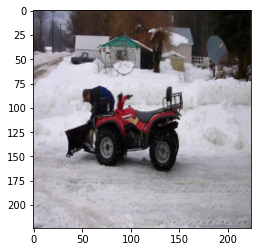

In [34]:
images, labels = next(iter(original_loader))
im = np.asarray(images[0])
im = np.moveaxis(im, 0, -1)
print(im.shape)
print(dic[int(labels[0])])
plt.imshow(im)

In [35]:
trial = Trial(model, optimizer, criterion, metrics=['loss', 'accuracy']).to(device)
trial.with_test_generator(original_loader)
trial.run(1)
results = trial.evaluate(data_key=torchbearer.TEST_DATA)

In [36]:
results

{'test_acc': 0.4050179421901703, 'test_loss': 4.433887004852295}

In [ ]:

# Resnet18 10 epochs SGD
# same as train : 'test_acc': 0.5352449417114258
# original : 'test_acc': 0.3859020471572876


# Resnet18 20 epochs SGD
# same as train : 'test_acc': 0.5997610688209534
# original : 'test_acc': 0.3897252082824707


# Resnet18 30 epochs SGD
# same as train : 'test_acc': 0.6043010950088501
# original : 'test_acc': 0.4050179421901703


## 3. My own model

In [ ]:
from torchbearer import Trial
import torch.nn.functional as F

In [ ]:
# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import numpy as np
np.random.seed(seed)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, (31, 31), padding=0)
        self.conv2 = nn.Conv2d(10, 10, (16, 16), padding=0)
        self.conv3 = nn.Conv2d(10, 5, (3, 3), padding=2)
        self.fc1 = nn.Linear(2205, 2048)
        self.fc2 = nn.Linear(2048, 512)
        self.fc3 = nn.Linear(512, 9)
    
    def forward(self, x):
        # YOUR CODE HERE
        out = self.conv1(x)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        
        out = self.conv2(out)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        
        
        out = self.conv3(out)
        out = F.relu(out)
        out = F.max_pool2d(out, (2,2))
        
        out = F.dropout(out, 0.2)
        
        out = out.view(out.shape[0], -1)
        
        
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        
        return out

In [ ]:
model = CNN()
print(sum([i.numel() for i in model.parameters()]))

5626498


In [ ]:
#reset the data loaders
torch.manual_seed(seed)
# build the model
model = CNN()

# define the loss function and the optimiser
loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = "cuda:0" if torch.cuda.is_available() else "cpu"
trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy']).to(device)
trial.with_generators(dataloaders["train"], test_generator=dataloaders["test"])
trial.run(epochs=10)
results = trial.evaluate(data_key=torchbearer.TEST_DATA)
print(results)

#assert results['test_acc'] > 0.99


0/10(t):   0%|          | 0/710 [00:00<?, ?it/s]